In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import sys as sys
import re


In [2]:
# Load the CSV file as a pandas DataFrame
csv_path = 'Dataset1.csv'
df = pd.read_csv(csv_path)
df.head()
df.columns.values


array(['dms_orig', 'dms_dest', 'sctg2', 'dms_mode',
       'thousand tons in 2017', 'thousand tons in 2018',
       'thousand tons in 2019', 'thousand tons in 2020',
       'thousand tons in 2021', 'thousand tons in 2022',
       'thousand tons in 2023', 'thousand tons in 2024',
       'thousand tons in 2030', 'thousand tons in 2030_low',
       'thousand tons in 2030_high', 'thousand tons in 2035',
       'thousand tons in 2035_low', 'thousand tons in 2035_high',
       'thousand tons in 2040', 'thousand tons in 2040_low',
       'thousand tons in 2040_high', 'thousand tons in 2045',
       'thousand tons in 2045_low', 'thousand tons in 2045_high',
       'thousand tons in 2050', 'thousand tons in 2050_low',
       'thousand tons in 2050_high'], dtype=object)

In [3]:
# Replace all values in the column with only the number part (convert to int, remove leading zeros)
import re

def extract_number(val):
    match = re.match(r'(\d+)-[A-Za-z]+', str(val))
    if match:
        return int(match.group(1))
    return val

# Replace 'col' with the actual column name you want to process
df['dms_orig'] = df['dms_orig'].apply(extract_number)
df['dms_dest'] = df['dms_dest'].apply(extract_number)
df.head()

,dms_orig,dms_dest,sctg2,dms_mode,thousand tons in 2017,thousand tons in 2018,thousand tons in 2019,thousand tons in 2020,thousand tons in 2021,thousand tons in 2022,...,thousand tons in 2035_high,thousand tons in 2040,thousand tons in 2040_low,thousand tons in 2040_high,thousand tons in 2045,thousand tons in 2045_low,thousand tons in 2045_high,thousand tons in 2050,thousand tons in 2050_low,thousand tons in 2050_high
0,11,1,21-Pharmaceuticals,1-Truck,79.8276,75.7832,77.5229,79.5264,83.8156,91.2031,...,173.2537,200.1272,191.5130,204.1298,236.2824,223.6532,241.0081,275.0769,257.6449,280.5784
1,11,1,21-Pharmaceuticals,5-Multiple modes & mail,5.7772,5.4845,5.6104,5.7554,6.0659,6.6005,...,12.0651,13.8194,13.3017,14.0958,16.1751,15.3967,16.4986,18.7110,17.6146,19.0852
2,11,2,21-Pharmaceuticals,5-Multiple modes & mail,0.0001,0.0000,0.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,11,4,21-Pharmaceuticals,4-Air (include truck-air),0.0238,0.0226,0.0231,0.0237,0.0250,0.0272,...,0.0434,0.0517,0.0511,0.0527,0.0629,0.0618,0.0641,0.0765,0.0747,0.0780
4,11,4,21-Pharmaceuticals,5-Multiple modes & mail,0.1350,0.1281,0.1311,0.1345,0.1417,0.1542,...,0.2462,0.2935,0.2901,0.2994,0.3569,0.3509,0.3640,0.4340,0.4238,0.4427


In [4]:
# Sort the DataFrame by the values in a column
# Replace 'col' with the actual column name you want to sort by
df = df.sort_values(by='dms_orig')
df

,dms_orig,dms_dest,sctg2,dms_mode,thousand tons in 2017,thousand tons in 2018,thousand tons in 2019,thousand tons in 2020,thousand tons in 2021,thousand tons in 2022,...,thousand tons in 2035_high,thousand tons in 2040,thousand tons in 2040_low,thousand tons in 2040_high,thousand tons in 2045,thousand tons in 2045_low,thousand tons in 2045_high,thousand tons in 2050,thousand tons in 2050_low,thousand tons in 2050_high
0,11,1,21-Pharmaceuticals,1-Truck,79.8276,75.7832,77.5229,79.5264,83.8156,91.2031,...,173.2537,200.1272,191.5130,204.1298,236.2824,223.6532,241.0081,275.0769,257.6449,280.5784
1,11,1,21-Pharmaceuticals,5-Multiple modes & mail,5.7772,5.4845,5.6104,5.7554,6.0659,6.6005,...,12.0651,13.8194,13.3017,14.0958,16.1751,15.3967,16.4986,18.7110,17.6146,19.0852
2,11,2,21-Pharmaceuticals,5-Multiple modes & mail,0.0001,0.0000,0.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,11,4,21-Pharmaceuticals,4-Air (include truck-air),0.0238,0.0226,0.0231,0.0237,0.0250,0.0272,...,0.0434,0.0517,0.0511,0.0527,0.0629,0.0618,0.0641,0.0765,0.0747,0.0780
4,11,4,21-Pharmaceuticals,5-Multiple modes & mail,0.1350,0.1281,0.1311,0.1345,0.1417,0.1542,...,0.2462,0.2935,0.2901,0.2994,0.3569,0.3509,0.3640,0.4340,0.4238,0.4427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,560,54,21-Pharmaceuticals,5-Multiple modes & mail,0.0005,0.0004,0.0004,0.0005,0.0005,0.0005,...,0.0007,0.0008,0.0007,0.0008,0.0010,0.0008,0.0010,0.0011,0.0008,0.0011
8060,560,55,21-Pharmaceuticals,4-Air (include truck-air),0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,...,0.0003,0.0003,0.0003,0.0003,0.0004,0.0003,0.0004,0.0004,0.0004,0.0005
8061,560,55,21-Pharmaceuticals,5-Multiple modes & mail,0.0188,0.0178,0.0182,0.0187,0.0197,0.0215,...,0.0311,0.0370,0.0349,0.0377,0.0448,0.0415,0.0457,0.0536,0.0487,0.0593
8062,560,56,21-Pharmaceuticals,1-Truck,0.2989,0.2837,0.2902,0.2977,0.3138,0.3415,...,0.5508,0.5644,0.5588,0.6724,0.6732,0.6664,0.8114,0.8124,0.8043,0.9882


In [ ]:
df["dms_orig"].unique()

origins_idx=np.arange(len(df["dms_orig"].unique()))
destinations_idx=np.arange(len(df["dms_dest"].unique()))
#print(len(origins_idx))

#building dictionaries to map the original values to the new indices
origins_dict={df["dms_orig"].unique()[i]:origins_idx[i] for i in range(len(df["dms_orig"].unique()))}
destinations_dict={df["dms_dest"].unique()[i]:destinations_idx[i] for i in range(len(df["dms_dest"].unique()))}

132


In [6]:
M_logistics=np.zeros((len(df["dms_orig"].unique()),len(df["dms_dest"].unique())))
#rows are origins, columns are destinations
print(M_logistics.shape)
# expected outcome: (number of unique origins, number of unique destinations)
# can store a value representing the quantity of goods transported from origin i to destination j.
np.set_printoptions(threshold=False)
print(M_logistics)
# Each cell in the matrix (M_logistics[i][j]) 


(132, 51)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:

for ii in range(len(df)):
	o=origins_dict[df["dms_orig"].iloc[ii]]
	d=destinations_dict[df["dms_dest"].iloc[ii]]
	M_logistics[o,d]=df["thousand tons in 2017"].iloc[ii]

origin_code = 11   # replace with the actual dms_orig code
dest_code   = 13  # replace with the actual dms_dest code

o = origins_dict[origin_code]
d = destinations_dict[dest_code]
tons = M_logistics[o, d]
print(tons)

# Updates the matrix M_logistics at the position [o, d] 
# (origin index o, destination index d) with the value from the thousand tons in 2017 column for the current row.

0.0078


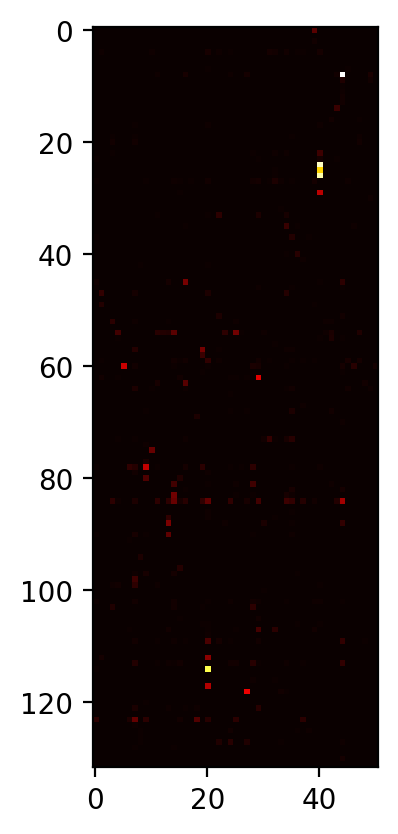

In [8]:

plt.figure(dpi=200)
plt.imshow(M_logistics, cmap='hot')

In [9]:
# Create a directed weighted graph from M_logistics using networkx
G = nx.DiGraph()
num_origins, num_destinations = M_logistics.shape
for i in range(num_origins):
    for j in range(num_destinations):
        weight = M_logistics[i, j]
        if weight > 0:
            G.add_edge(i, j, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# number of nodes and edges in the graph using the number_of_nodes() and number_of_edges() methods, respectively. 
# These outputs provide a quick summary of the graph's structure, showing how many nodes and connections were created based on the non-zero weights in the M_logistics matrix.

Number of nodes: 132
Number of edges: 4461


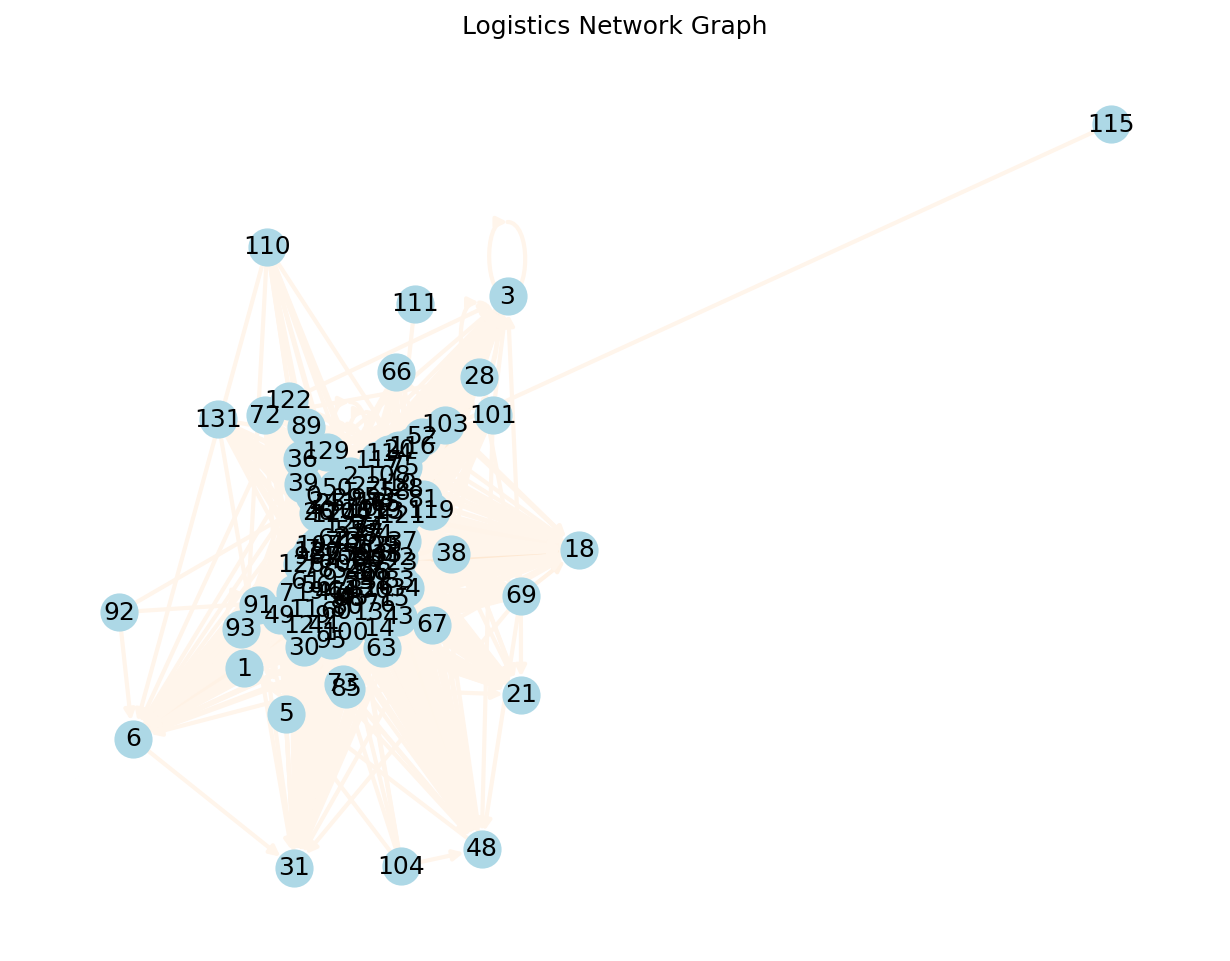

In [10]:
# Visualize the graph using networkx and matplotlib
plt.figure(figsize=(8,6), dpi=150)
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_weights, width=2, edge_cmap=plt.cm.Oranges)
plt.title('Logistics Network Graph')
plt.show()

Doing some testing and building transportation mode matrices

In [11]:
# Get unique transportation modes for 2017
modes = df["dms_mode"].unique()
mode_matrices = {mode: np.zeros((len(df["dms_orig"].unique()), len(df["dms_dest"].unique()))) for mode in modes}

# Populate each matrix
for ii in range(len(df)):
    o = origins_dict[df["dms_orig"].iloc[ii]]
    d = destinations_dict[df["dms_dest"].iloc[ii]]
    mode = df["dms_mode"].iloc[ii]
    mode_matrices[mode][o, d] = df["thousand tons in 2017"].iloc[ii]

# Example: Access the matrix for a specific mode
a= mode_matrices["1-Truck"]
print(f"Truck mode in 2017 \n{a}")
#Checking if the values are correct (look the dataset in excel)

total_cells = mode_matrices["1-Truck"].size
mode = "1-Truck" 
origin_code = 122      # your dms_orig value
dest_code = 4        # your dms_dest value

o = origins_dict.get(origin_code)
d = destinations_dict.get(dest_code)
if o is None or d is None:
    print("/n Origin or destination not found.")
else:
    tons = mode_matrices[mode][o, d]
    print(f"\n Tons for {mode}, {origin_code}->{dest_code}: {tons}")


Truck mode in 2017 
[[1.000e-04 1.842e-01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.191e-01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 4.650e-02 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 3.000e-04 ... 1.670e-02 0.000e+00 9.000e-04]
 [0.000e+00 0.000e+00 0.000e+00 ... 3.000e-03 0.000e+00 0.000e+00]]

 Tons for 1-Truck, 122->4: 0.1253


Total weight per destination:
[161.2058 180.7197  80.0986 ...  53.6458  67.1918  21.763 ]

 Total weight per origin:
[ 83.3277   0.495   10.2391 ...  43.2143 107.0293   0.7432]
the number of unique destinations is: 51
the number of unique origins is: 132

Group 1:
  Destination Index 0: Total Weight 161.2058
  Destination Index 1: Total Weight 180.71970000000002
  Destination Index 2: Total Weight 80.09860000000002
  Destination Index 3: Total Weight 312.56339999999994
  Destination Index 4: Total Weight 238.22009999999992
  Destination Index 5: Total Weight 325.6240000000001
  Destination Index 6: Total Weight 97.1103
  Destination Index 7: Total Weight 769.2684
  Destination Index 8: Total Weight 65.0467
  Destination Index 9: Total Weight 767.6464
  Destination Index 10: Total Weight 108.6248
  Destination Index 11: Total Weight 479.76329999999984
  Destination Index 12: Total Weight 135.5769
  Destination Index 13: Total Weight 655.2791000000002
  Destination Index 14: Total Weight

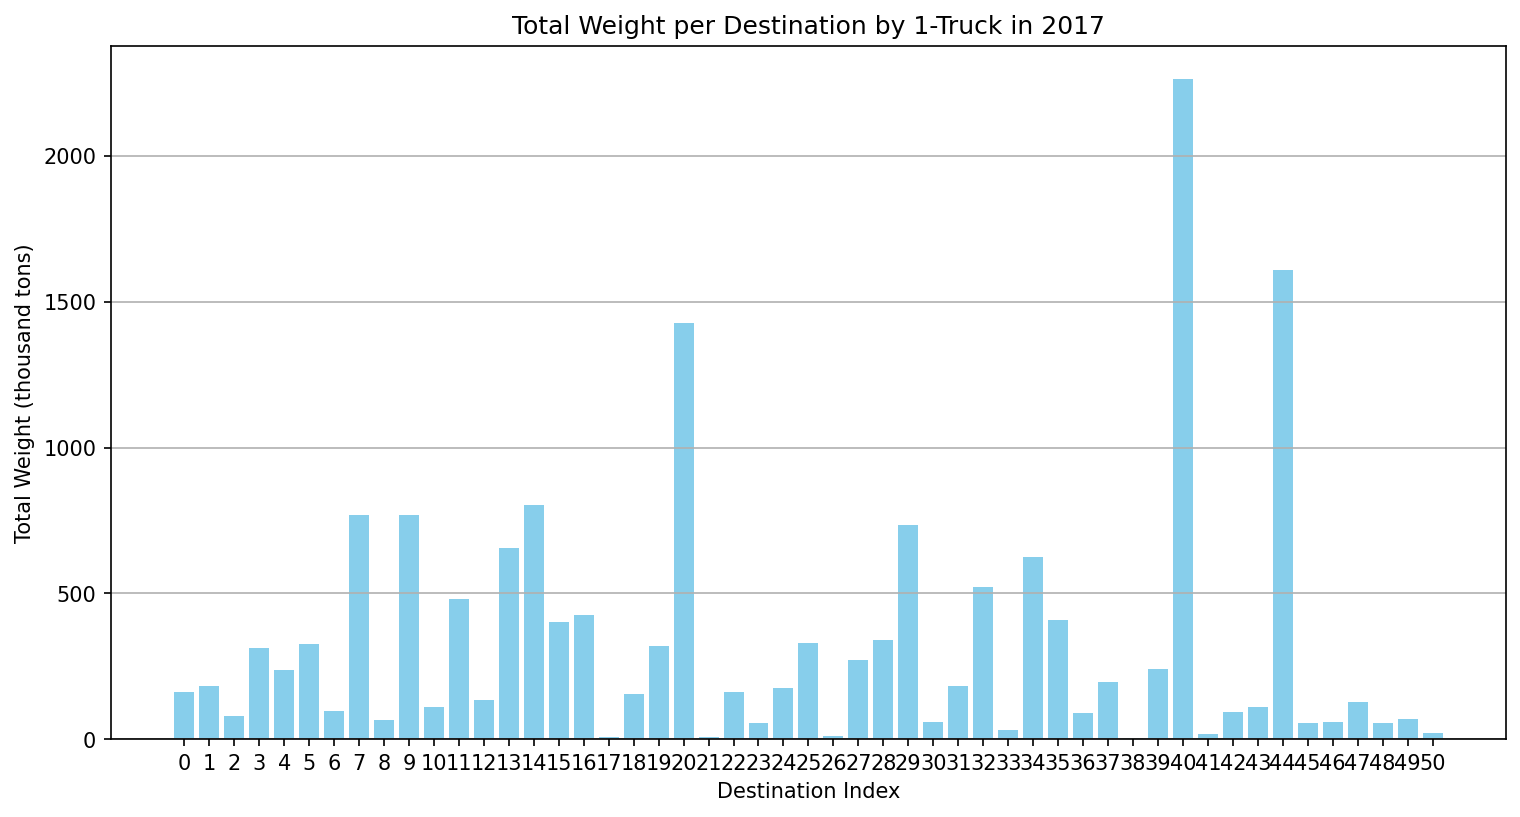

In [12]:

# Total weight per destination (column sums) by 1-truck
destination_totals = mode_matrices["1-Truck"].sum(axis=0)
print("Total weight per destination:")
print(destination_totals)

# Total weight per destination (row sums) by 1-truck
origin_totals = mode_matrices["1-Truck"].sum(axis=1)
print("\n Total weight per origin:")
print(origin_totals)

a=len(destination_totals)
b=len(origin_totals)
print(f"the number of unique destinations is: {a}")
print(f"the number of unique origins is: {b}")

dest_indices=np.arange(destination_totals.size)
groups=[]
for start in range(0,destination_totals.size,17):
    idx_slice=dest_indices[start:start+17]
    val_slice=destination_totals[start:start+17]
    group=list(zip(idx_slice,val_slice))
    groups.append(group)

#It is showing the total weight for each destination index within each group of 17 destinations.
#For instance, Destination index 0 refers to Alabama, so it shows the total weight transported to Alabama by 1-Truck.
for g,items in enumerate(groups,1):
    print(f"\nGroup {g}:")
    for col_idx,total in items:
        print(f"  Destination Index {col_idx}: Total Weight {total}")

# Visualize the destination totals using a bar chart
plt.figure(figsize=(12, 6), dpi=150)
plt.bar(dest_indices, destination_totals, color='skyblue')
plt.xlabel('Destination Index')
plt.ylabel('Total Weight (thousand tons)')
plt.title('Total Weight per Destination by 1-Truck in 2017')
plt.xticks(dest_indices)
plt.grid(axis='y')
plt.show()

YearGroup  2017–2020   2021–2024
dms_dest                        
1           940.6897   1117.2674
2            19.0652     22.6438
4           719.2711    854.2869
5           211.8451    251.6107
6          6306.5703   7490.3777
8           431.0095    511.9143
9           358.5362    425.8382
10          496.1615    589.2971
11           71.9704     85.4801
12         8867.0553  10531.4919
13         2039.6520   2422.5148
15          263.1696    312.5692
16          116.5196    138.3917
17         2443.8297   2902.5603
18         1599.3207   1899.5304
19          346.3704    411.3897
20          760.7865    903.5942
21          631.3938    749.9122
22          707.8239    840.6901
23          313.7210    372.6096
24         1224.2141   1454.0136
25          933.0353   1108.1754
26         1248.0957   1482.3761
27         1275.3706   1514.7711
28         1578.6889   1875.0249
29         1671.7166   1985.5157
30           25.6019     30.4079
31          210.1131    249.5529
32        

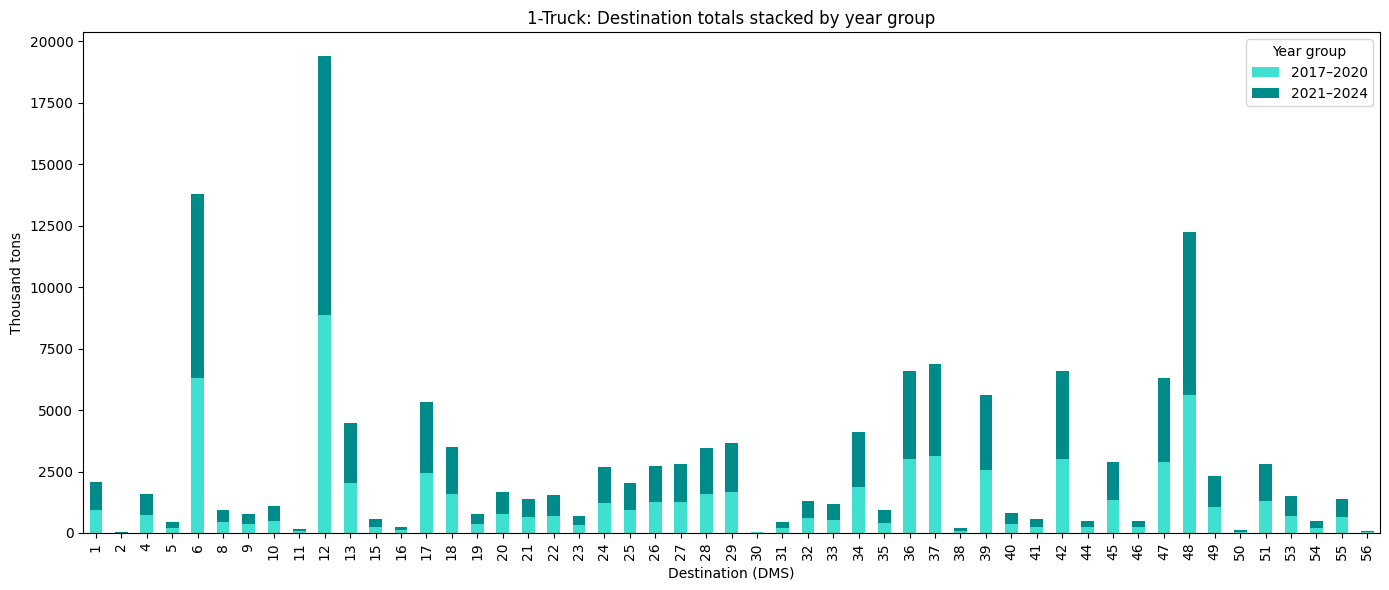

In [13]:
mode = "1-Truck"  # replace/loop as needed

# 1) keep mode and year columns only
df_mode = df[df["dms_mode"] == mode].copy()

year_cols = [
    c for c in df_mode.columns
    if re.fullmatch(r"thousand tons in \d{4}", c)
    and 2017 <= int(c[-4:]) <= 2024
]

# 2) reshape wide -> long using pd.melt() and create year groups (seaborn functions prefer long format)
df_long = (
    df_mode.melt(
        id_vars=["dms_dest"],
        value_vars=year_cols,
        var_name="YearLabel",
        value_name="Tons"
    )
    .assign(
        Year=lambda t: t["YearLabel"].str.extract(r"(\d{4})").astype(int),
        YearGroup=lambda t: np.where(t["Year"].between(2017, 2020), "2017–2020", "2021–2024")
    )
)

# 3) aggregate (destination × year-group) and plot
totals = (
    df_long.groupby(["dms_dest", "YearGroup"])["Tons"]
           .sum()
           .unstack(fill_value=0)
)

print(totals)

ax = totals.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6),
    color=["#40E0D0", "#008B8B"]  # two turquoise tones
)


ax.set_ylabel("Thousand tons")
ax.set_xlabel("Destination (DMS)")
ax.set_title(f"{mode}: Destination totals stacked by year group")
ax.legend(title="Year group")
plt.tight_layout()
plt.show()



5-Multiple modes & mail totals:
 Scenario  dms_dest  Year  baseline     high      low
0                1  2030   34.4141  37.8551  34.0426
1                1  2035   40.2390  41.0440  39.2261
2                1  2040   47.0134  47.8091  45.2378
3                1  2045   55.0298  55.9747  52.3660
4                1  2050   63.6003  64.7137  59.8597


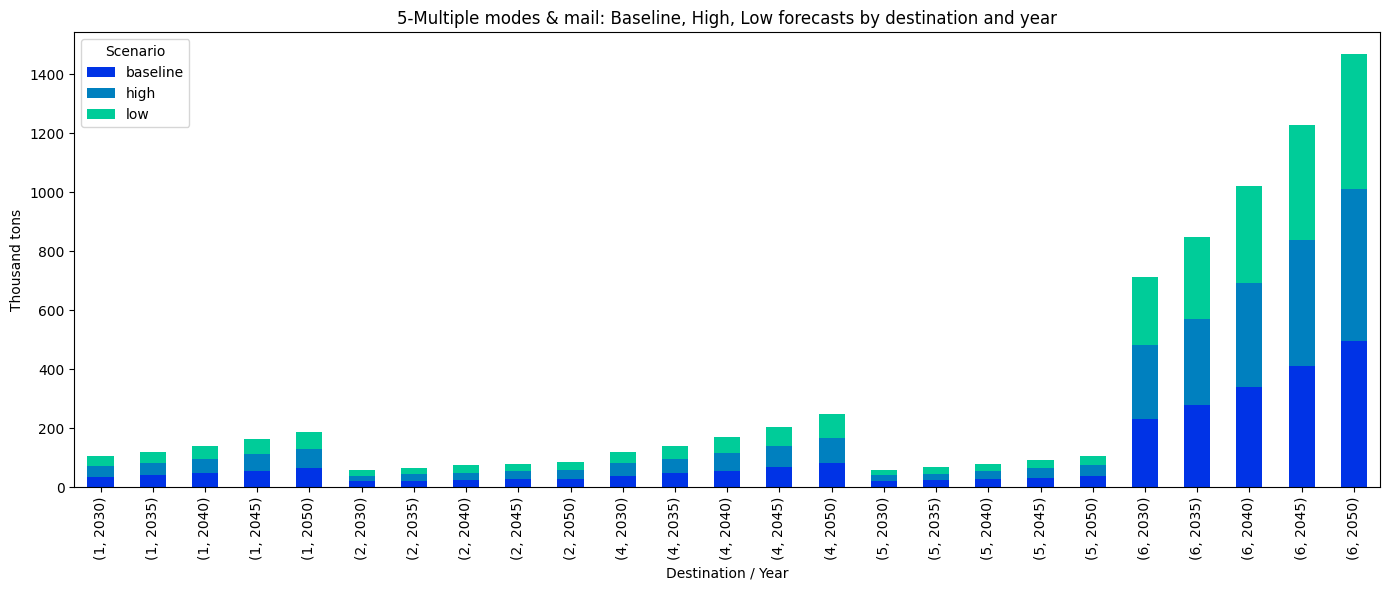


1-Truck totals:
 Scenario  dms_dest  Year  baseline      high       low
0                1  2030  410.4942  451.5439  406.0278
1                1  2035  480.9879  490.6074  468.0051
2                1  2040  563.0667  572.0441  540.7795
3                1  2045  660.4792  671.2249  627.3616
4                1  2050  764.1772  776.7760  718.0298


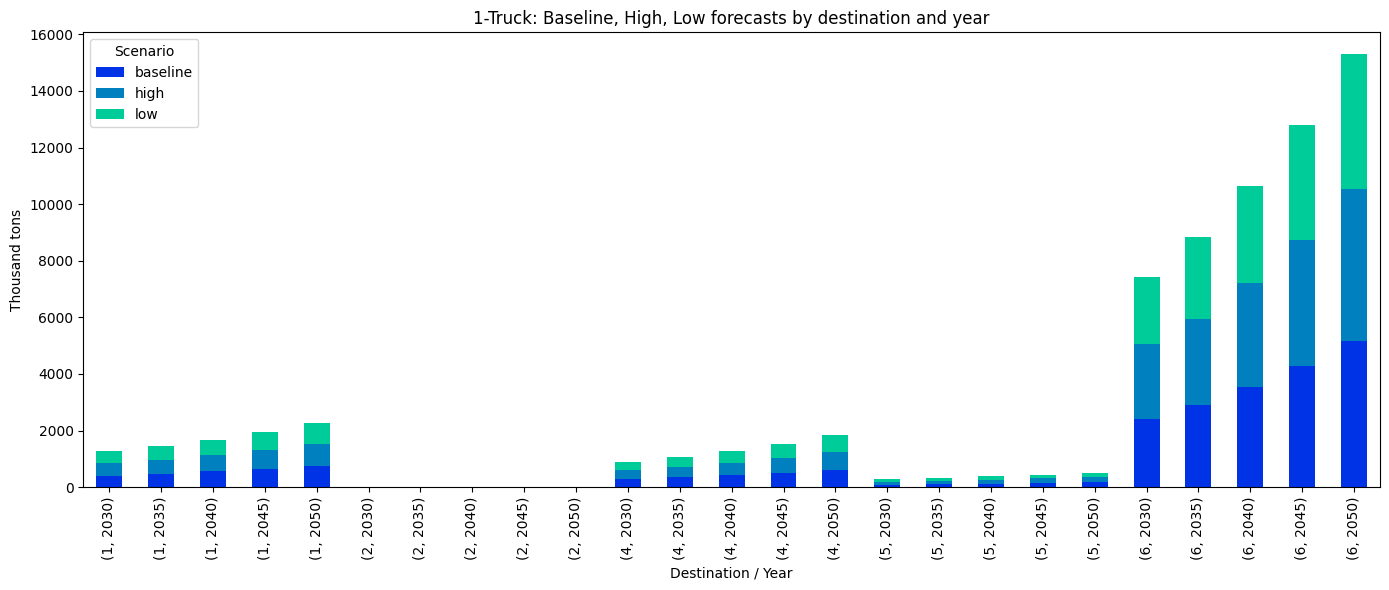


4-Air (include truck-air) totals:
 Scenario  dms_dest  Year  baseline    high     low
0                1  2030    0.4981  0.5478  0.4928
1                1  2035    0.5783  0.5897  0.5655
2                1  2040    0.6705  0.6774  0.6470
3                1  2045    0.7790  0.7894  0.7434
4                1  2050    0.8924  0.9042  0.8425


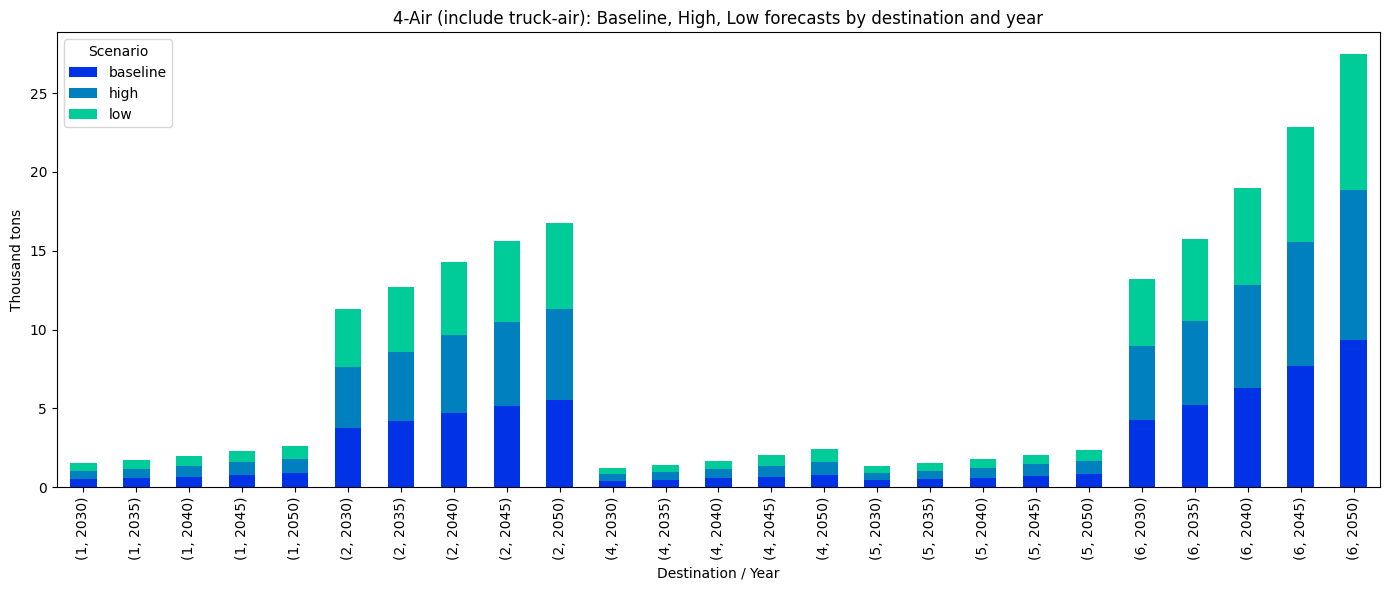


3-Water totals:
 Scenario  dms_dest  Year  baseline    high     low
0               15  2030    3.2145  3.5360  3.2113
1               15  2035    3.6171  3.9224  3.5809
2               15  2040    3.8758  4.2161  3.8370
3               15  2045    4.2704  4.6422  4.2277
4               15  2050    4.5864  5.0004  4.5405


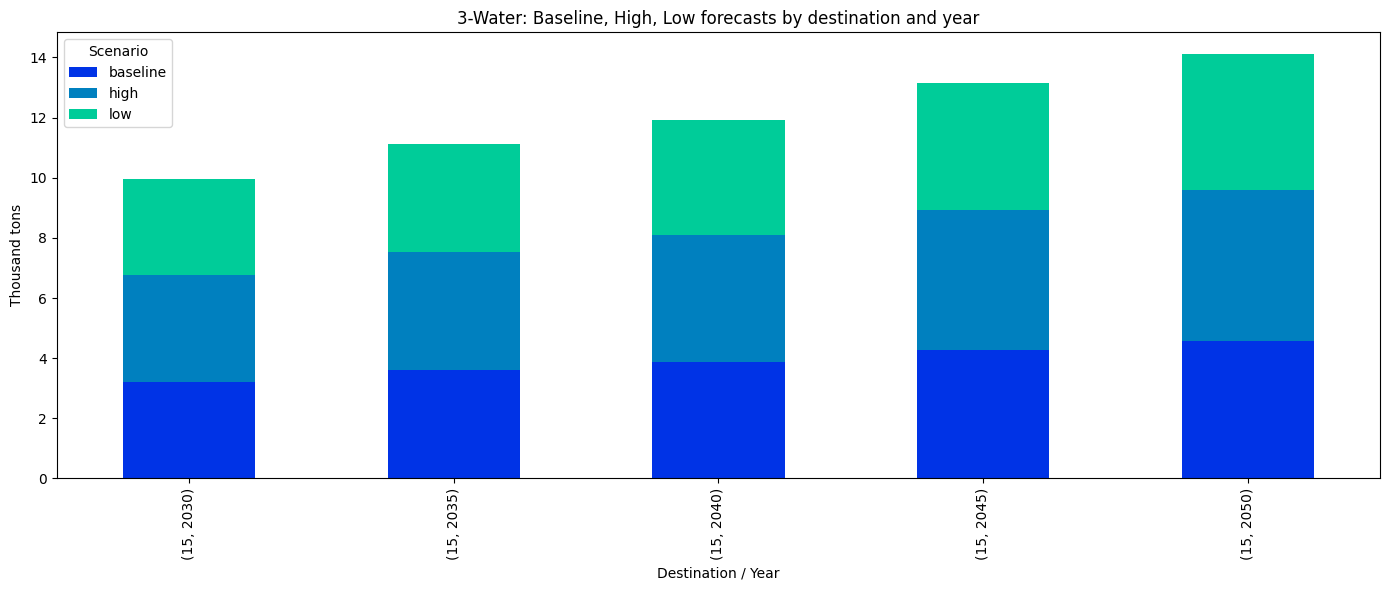


2-Rail totals:
 Scenario  dms_dest  Year  baseline     high      low
0                4  2030    9.9791  10.9770   9.8853
1                4  2035   12.1352  12.2946  12.0817
2                4  2040   14.7572  15.0523  14.5850
3                4  2045   17.9457  18.3046  17.6456
4                4  2050   21.8231  22.2595  21.3110


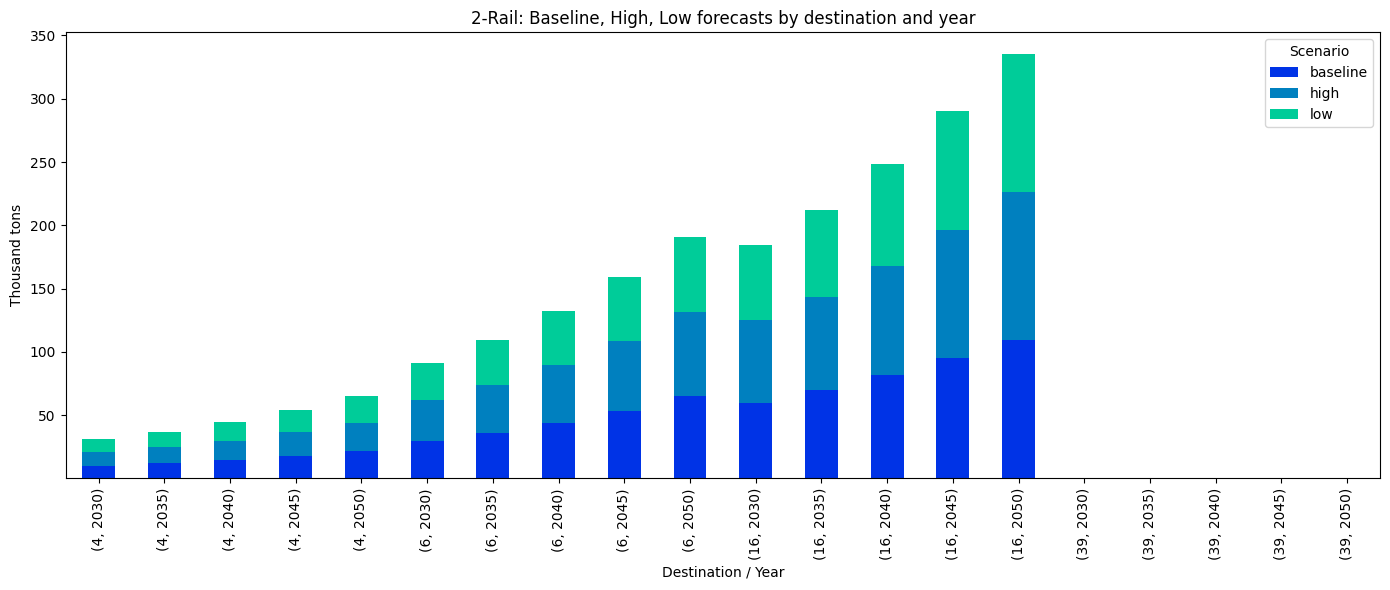

In [14]:
pattern = re.compile(r"^thousand tons in (2030|2035|2040|2045|2050)(?:_(low|high))?$")

for mode in df["dms_mode"].dropna().unique():
    df_mode = df[df["dms_mode"] == mode].copy()
    year_cols = [c for c in df_mode.columns if pattern.fullmatch(c)]
    if not year_cols:
        continue  # skip modes without the forecast columns

    df_future = df_mode[["dms_dest"] + year_cols]

    df_long = (
        df_future.melt(id_vars=["dms_dest"], var_name="YearLabel", value_name="Tons")
        .assign(
            Year=lambda t: t["YearLabel"].str.extract(r"(\d{4})").astype(int),
            Scenario=lambda t: t["YearLabel"].str.extract(r"_(low|high)$").fillna("baseline")
        )
    )
    df_long["Tons"] = pd.to_numeric(df_long["Tons"], errors="coerce")

    totals = (
        df_long.groupby(["dms_dest", "Year", "Scenario"])["Tons"]
               .sum()
               .unstack("Scenario")
               .reindex(columns=["baseline", "high", "low"])
               .reset_index()
    )

    print(f"\n{mode} totals:\n", totals.head())

    subset = totals["dms_dest"].unique()[:5]
    plot_data = (
        totals[totals["dms_dest"].isin(subset)]
        .set_index(["dms_dest", "Year"])[["baseline", "high", "low"]]
    )

    colors = plt.cm.winter(np.linspace(0.2, 0.8, 3))
    ax = plot_data.plot(kind="bar", stacked=True, figsize=(14, 6), color=colors)
    ax.set_ylabel("Thousand tons")
    ax.set_xlabel("Destination / Year")
    ax.set_title(f"{mode}: Baseline, High, Low forecasts by destination and year")
    ax.legend(title="Scenario")
    plt.tight_layout()
    plt.show()

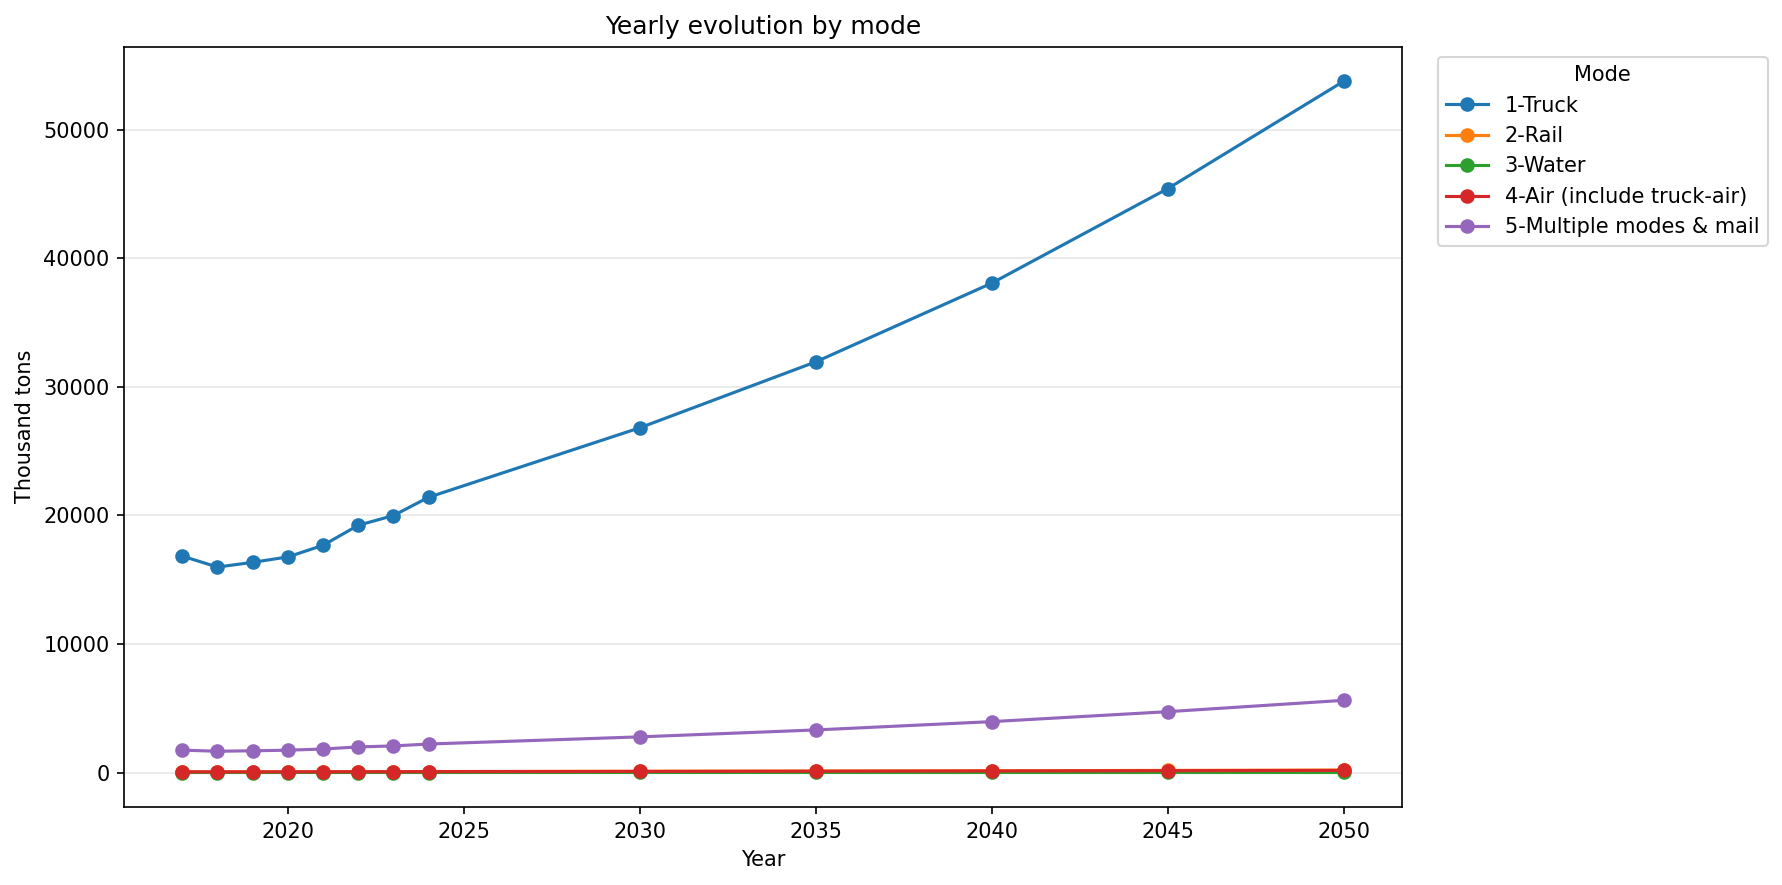

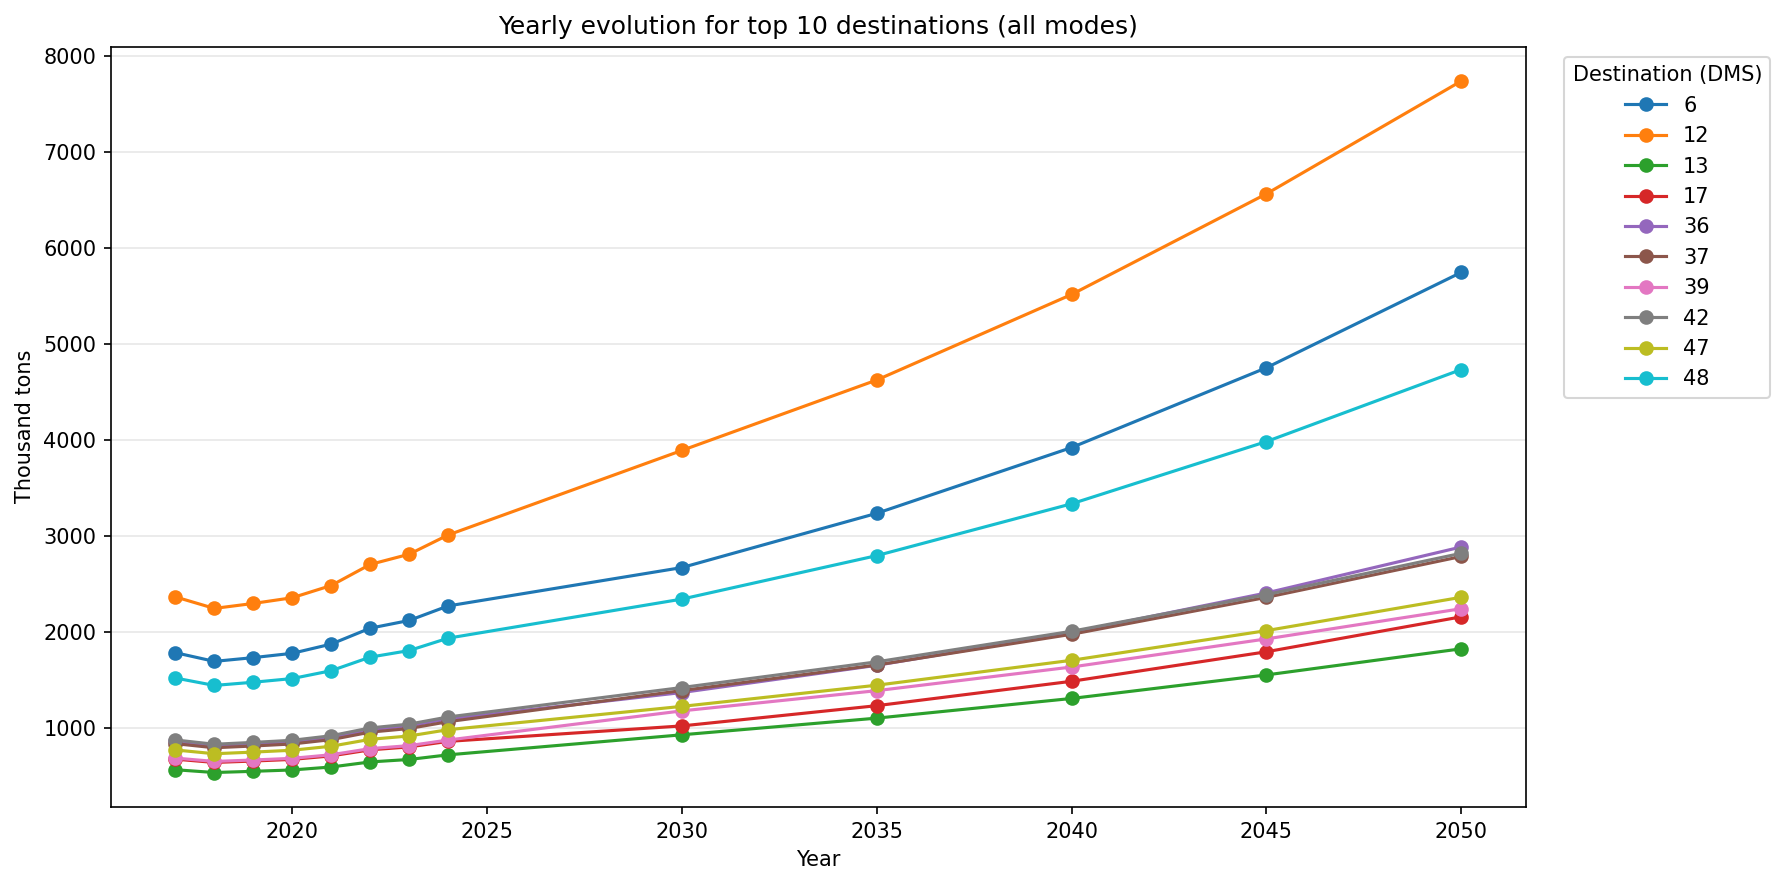

   Year                   dms_mode        Tons
0  2017                    1-Truck  16829.4385
1  2017                     2-Rail     61.0025
2  2017                    3-Water      1.9985
3  2017  4-Air (include truck-air)     53.8428
4  2017    5-Multiple modes & mail   1742.6835


In [15]:
# Yearly line charts: by mode, and for top-N destinations (all modes)

# 1) Find yearly columns like 'thousand tons in YYYY'
year_cols = [c for c in df.columns if re.fullmatch(r"thousand tons in \d{4}", c)]
if not year_cols:
    raise ValueError("No yearly columns matching 'thousand tons in YYYY'.")

# 2) Long format
df_years_long = (
    df.melt(
        id_vars=["dms_mode", "dms_dest"],
        value_vars=year_cols,
        var_name="YearLabel",
        value_name="Tons"
    )
    .assign(
        Year=lambda t: t["YearLabel"].str.extract(r"(\d{4})").astype(int),
        Tons=lambda t: pd.to_numeric(t["Tons"], errors="coerce").fillna(0.0)
    )
)

# 3) Line chart: yearly evolution by mode
mode_year = df_years_long.groupby(["Year", "dms_mode"], as_index=False)["Tons"].sum()
pvt_mode = mode_year.pivot(index="Year", columns="dms_mode", values="Tons").fillna(0).sort_index()

plt.figure(figsize=(12, 6), dpi=150)
for col in pvt_mode.columns:
    plt.plot(pvt_mode.index, pvt_mode[col], marker='o', label=str(col))
plt.title("Yearly evolution by mode")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title="Mode", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4) Line chart: yearly evolution for top-N destinations (across all modes)
TOP_N = 10  # adjust as needed
top_dest_ids = (
    df_years_long.groupby("dms_dest")["Tons"].sum().sort_values(ascending=False).head(TOP_N).index
)
dest_year = (
    df_years_long[df_years_long["dms_dest"].isin(top_dest_ids)]
    .groupby(["Year", "dms_dest"], as_index=False)["Tons"].sum()
)
pvt_dest = dest_year.pivot(index="Year", columns="dms_dest", values="Tons").fillna(0).sort_index()

plt.figure(figsize=(12, 6), dpi=150)
for col in pvt_dest.columns:
    plt.plot(pvt_dest.index, pvt_dest[col], marker='o', label=str(col))
plt.title(f"Yearly evolution for top {TOP_N} destinations (all modes)")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title="Destination (DMS)", bbox_to_anchor=(1.02, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

print(mode_year.head())


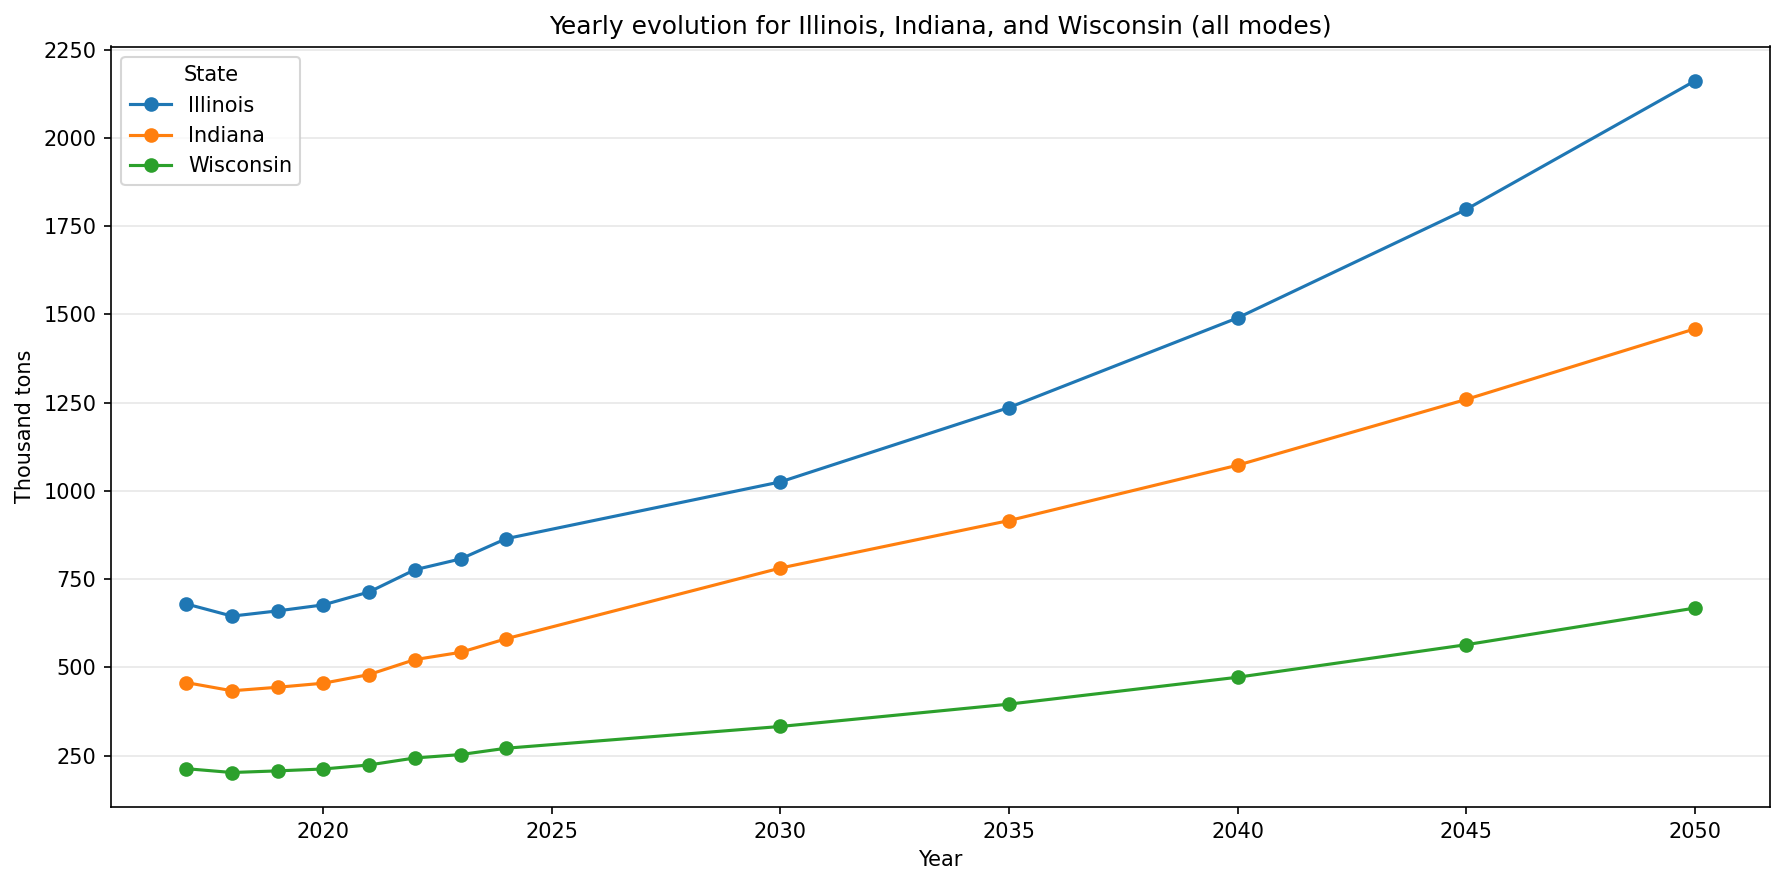

In [16]:
# Line chart for Indiana (18), Illinois (17), and Wisconsin (55), aggregated across all modes
state_names = {17: "Illinois", 18: "Indiana", 55: "Wisconsin"}
state_codes = list(state_names.keys())

available = [c for c in state_codes if c in df_years_long["dms_dest"].unique()]
missing = [c for c in state_codes if c not in available]
if missing:
    print(f"Missing state codes (no data): {missing}")

if available:
    data = (
        df_years_long[df_years_long["dms_dest"].isin(available)]
        .groupby(["Year", "dms_dest"], as_index=False)["Tons"]
        .sum()
        .sort_values("Year")
    )
    pvt = data.pivot(index="Year", columns="dms_dest", values="Tons").fillna(0).sort_index()

    plt.figure(figsize=(12, 6), dpi=150)
    for code in available:
        plt.plot(pvt.index, pvt[code], marker='o', label=state_names[code])
    plt.title("Yearly evolution for Illinois, Indiana, and Wisconsin (all modes)")
    plt.xlabel("Year")
    plt.ylabel("Thousand tons")
    plt.grid(True, axis='y', alpha=0.3)
    plt.legend(title="State")
    plt.tight_layout()
    plt.show()

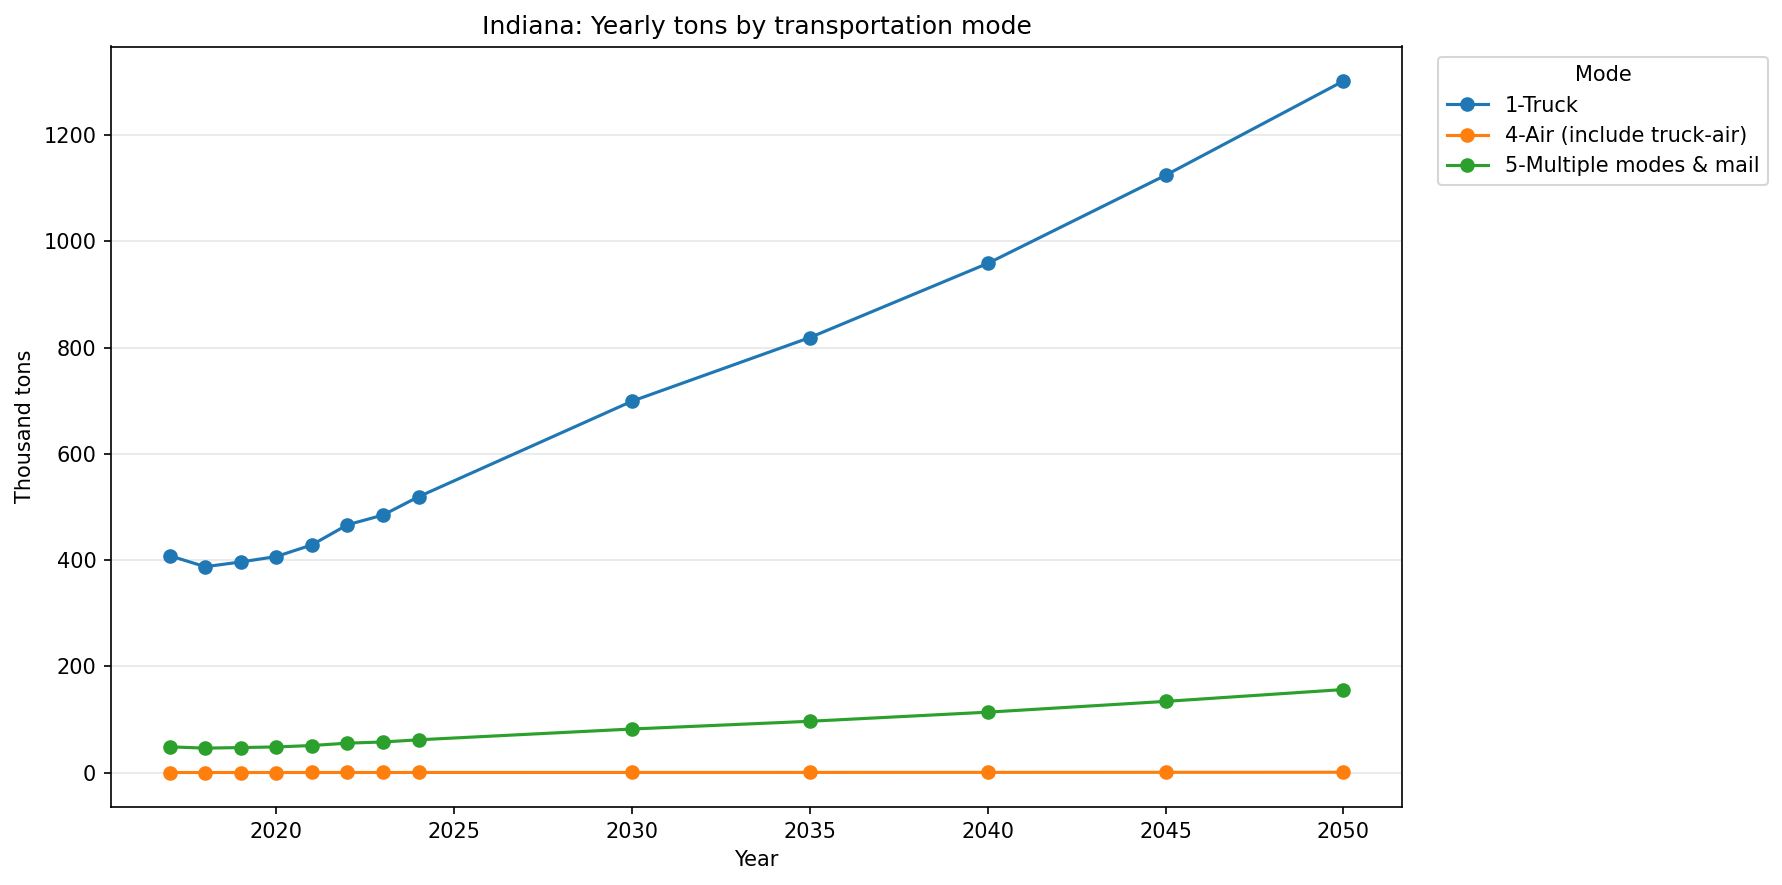

   Year                   dms_mode      Tons
0  2017                    1-Truck  408.3349
1  2017  4-Air (include truck-air)    0.2425
2  2017    5-Multiple modes & mail   48.5909
3  2018                    1-Truck  387.6468
4  2018  4-Air (include truck-air)    0.2303


In [17]:
# Line chart for Indiana (dms_dest = 18) by transportation mode
target_dms = 18
state_label = state_names.get(target_dms, f"DMS {target_dms}") if 'state_names' in globals() else f"DMS {target_dms}"

ind_mode = (
    df_years_long[df_years_long["dms_dest"] == target_dms]
    .groupby(["Year", "dms_mode"], as_index=False)["Tons"]
    .sum()
)
pvt_ind_mode = ind_mode.pivot(index="Year", columns="dms_mode", values="Tons").fillna(0).sort_index()

plt.figure(figsize=(12, 6), dpi=150)
for col in pvt_ind_mode.columns:
    plt.plot(pvt_ind_mode.index, pvt_ind_mode[col], marker='o', label=str(col))

plt.title(f"{state_label}: Yearly tons by transportation mode")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title="Mode", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(ind_mode.head())